In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

In [2]:
PROJECT_PATH = "D:/ProjectInterPromo/"

In [3]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [4]:
# Lecture du fichier de donnée
data_v0 = pd.read_csv(PROJECT_PATH + "data\sortie\Données_v0\Donnees_V0_NAN_supprimes.csv")

print("Nombre de fraude :", sum(data_v0["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_v0))
print("Ratio : ", sum(data_v0["TOP_FRAUDE"]) / len(data_v0) * 100)

# Suppression des variables qualitative
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

# 
data_quanti = data_quanti.sample(100000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(data_quanti["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_quanti))
print("Ratio : ", sum(data_quanti["TOP_FRAUDE"]) / len(data_quanti) * 100)

Nombre de fraude : 1479
Nombre de données :  644348
Ratio :  0.22953435100287423
------------ Sur un echantillion ------------
Nombre de fraude : 229
Nombre de données :  100000
Ratio :  0.22899999999999998


In [5]:
# Modele de prediction qui retourne un score
score = np.random.rand(len(data_quanti))

In [6]:
score

array([0.92249985, 0.21354362, 0.64335419, ..., 0.52713106, 0.28905025,
       0.55907791])

C:\Users\Stior\AppData\Local\Temp/ipykernel_12428/147864584.py:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


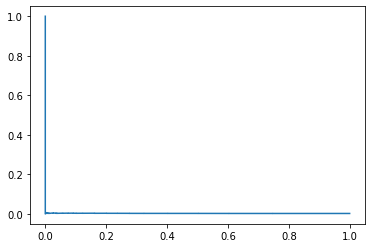

Air sous la courbe :  0.0026960476274424223


In [7]:
value, f1_score, precision, recall = evaluation(score, data_quanti["TOP_FRAUDE"], display=True)

# L'air sous la courbe
print("Air sous la courbe : ", value)